In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Loading the train 
train_data = pd.read_csv("Genre Classification Dataset/train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
#loading the test datasets
test_data = pd.read_csv("Genre Classification Dataset/test_data.txt", sep=':::', names=['ID', 'Genre', 'Description'], engine='python')
test_data.head()

,ID,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [4]:
#Displaying basic datasets statistics

In [5]:
train_data.describe()


,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
train_data.isnull().sum() #checking any missing values in the Dataset

Title          0
Genre          0
Description    0
dtype: int64

<Axes: >

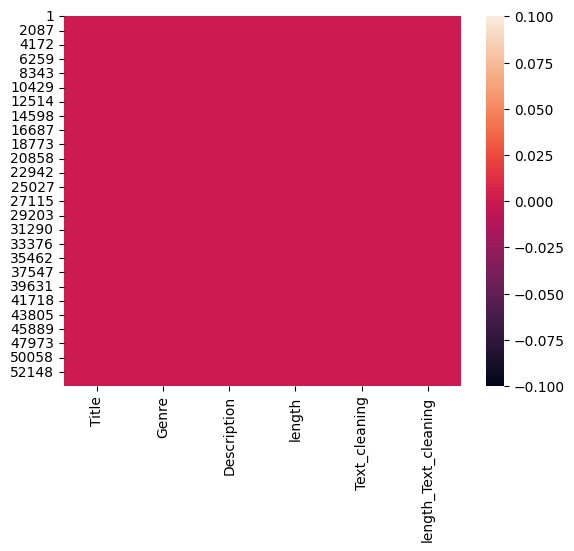

In [41]:
sns.heatmap(train_data.isnull())

In [8]:
# Plotting genre distribution in the train dataset

Text(0, 0.5, 'Count')

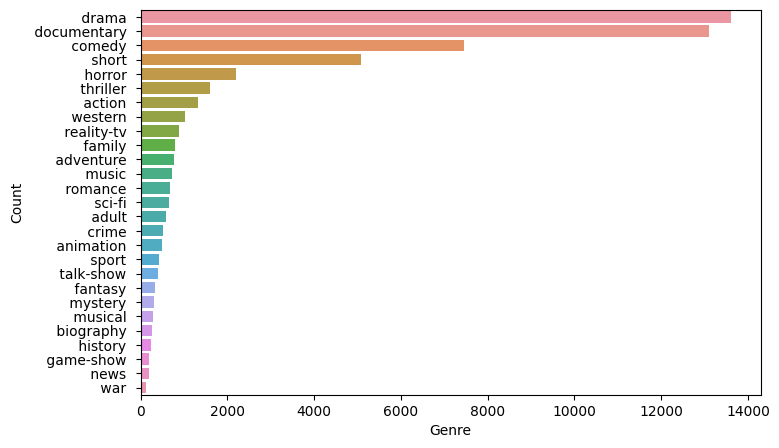

In [9]:
plt.figure(figsize=(8,5))
counts = train_data.Genre.value_counts()
sns.barplot(x=counts, y=counts.index, orient='h')  
plt.xlabel('Genre')
plt.ylabel('Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, ' drama '),
  Text(1, 0, ' documentary '),
  Text(2, 0, ' comedy '),
  Text(3, 0, ' short '),
  Text(4, 0, ' horror '),
  Text(5, 0, ' thriller '),
  Text(6, 0, ' action '),
  Text(7, 0, ' western '),
  Text(8, 0, ' reality-tv '),
  Text(9, 0, ' family '),
  Text(10, 0, ' adventure '),
  Text(11, 0, ' music '),
  Text(12, 0, ' romance '),
  Text(13, 0, ' sci-fi '),
  Text(14, 0, ' adult '),
  Text(15, 0, ' crime '),
  Text(16, 0, ' animation '),
  Text(17, 0, ' sport '),
  Text(18, 0, ' talk-show '),
  Text(19, 0, ' fantasy '),
  Text(20, 0, ' mystery '),
  Text(21, 0, ' musical '),
  Text(22, 0, ' biography '),
  Text(23, 0, ' history '),
  Text(24, 0, ' game-show '),
  Text(25, 0, ' news '),
  Text(26, 0, ' war ')])

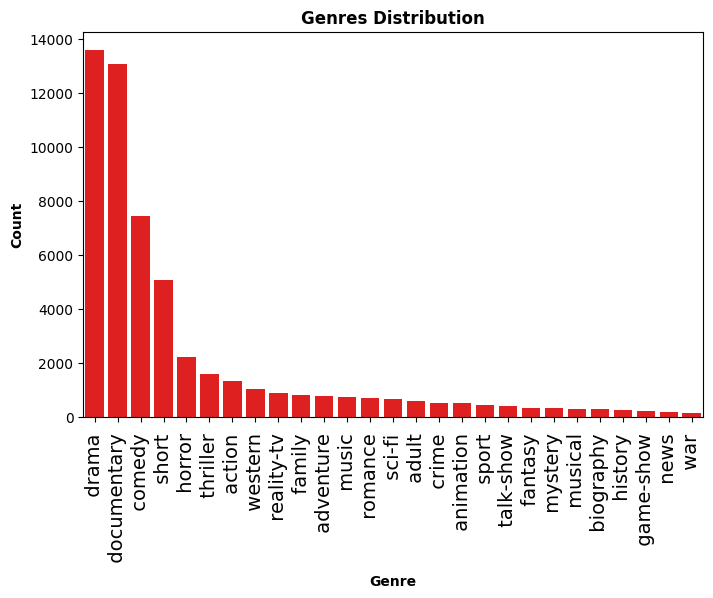

In [45]:
plt.figure(figsize=(8,5))
counts = train_data.Genre.value_counts()
sns.barplot(x=counts.index, y=counts, color='red')
plt.xlabel('Genre' ,fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.title('Genres Distribution', fontsize=12, fontweight='bold' )
plt.xticks(rotation=90, fontsize=14)
           
           

In [11]:
# Adding a new column to store description lengths
train_data['length']=train_data['Description'].apply(len)
train_data.head()

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


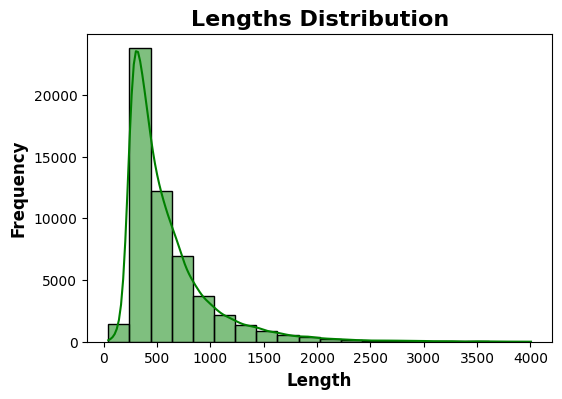

In [47]:
# Plotting distribution of description lengths
plt.figure(figsize=(6, 4))

sns.histplot(data=train_data, x='length', bins=20, kde=True, color='green')

plt.xlabel('Length', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Lengths Distribution', fontsize=16, fontweight='bold')

plt.show()

In [13]:
#Data cleaning and preprocessing

In [14]:
import nltk
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import re
import string

stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess the text data
def clean_text(text):
    text = text.lower()
    text = re.sub('-|@\S+|http\S+|pic.\S+|[^a-zA-Z\s]', ' ', text)
    words = nltk.tokenize.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]
    return ' '.join(stemmed_words).strip()

# Test the cleaning function
input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')


Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye iem ye


In [48]:
# import nltk
# nltk.download('punkt')


In [16]:
# Apply the cleaning function to the datasets
train_data['Text_cleaning'] = train_data.Description.apply(clean_text)
test_data['Text_cleaning'] = test_data.Description.apply(clean_text)

train_data.head()

,Title,Genre,Description,length,Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct par year old osc learn nobod...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd rel murd ...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat hist littl ...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film titl ref recov body ground zero also stat...


In [17]:
test_data.head()

,ID,Genre,Description,Text_cleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",bran lov lif car apart job espec girlfriend ve...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belong w...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,on year lif albin famy shepherd nor transylvan...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",fath died spok broth year sery cant diego tal ...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known intern mart art superst bruc lee appear ...


In [18]:
# Checking the length after cleaning
train_data['length_Text_cleaning']=train_data['Text_cleaning'].apply(len)
train_data.head()

,Title,Genre,Description,length,Text_cleaning,length_Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct par year old osc learn nobod...,306
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd rel murd ...,74
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat hist littl ...,311
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...,606
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film titl ref recov body ground zero also stat...,293


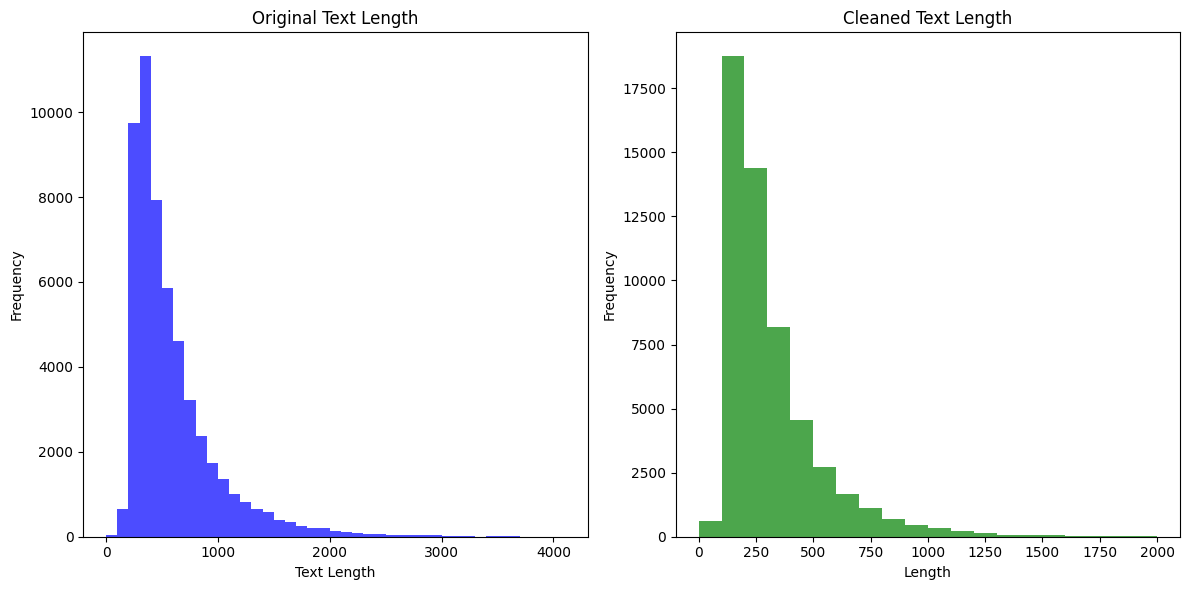

In [40]:
# Plotting the text length before and after cleaning
plt.figure(figsize=(12, 6))

# Original text length distribution
plt.subplot(1, 2, 1)
original_lengths = train_data['Description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='blue', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Cleaned text length distribution
plt.subplot(1, 2, 2)
cleaned_lengths = train_data['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [20]:
(train_data['length_Text_cleaning']>2000).value_counts()

False    54140
True        74
Name: length_Text_cleaning, dtype: int64

In [21]:
# Remove entries with cleaned description length > 2000
print(f"Dataframe size (before removal): {len(train_data)}")
filt = train_data['length_Text_cleaning'] > 2000
train_data = train_data[~filt]  # Keep rows with cleaned description length <= 2000
print(f"Dataframe size (after removal): {len(train_data)}")
print(f"Removed rows: {filt.sum()}")


Dataframe size (before removal): 54214
Dataframe size (after removal): 54140
Removed rows: 74


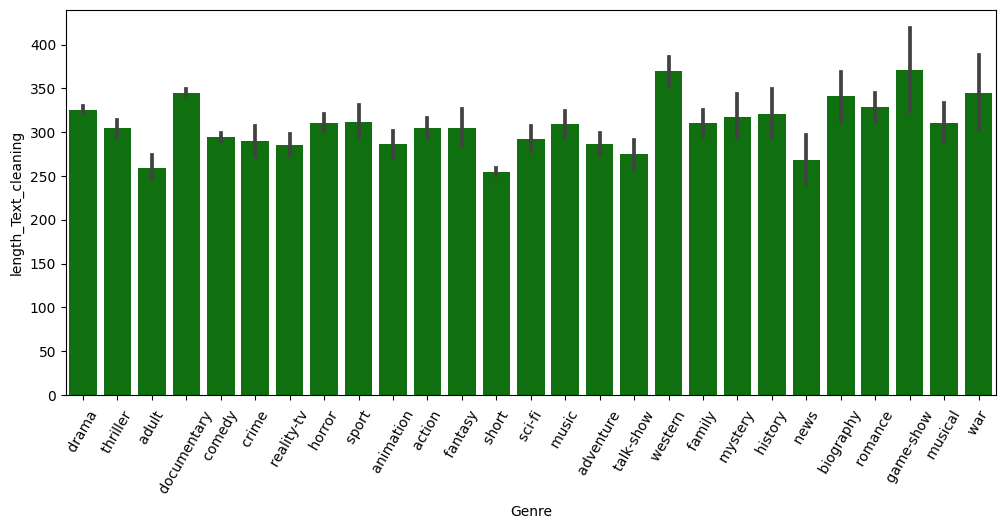

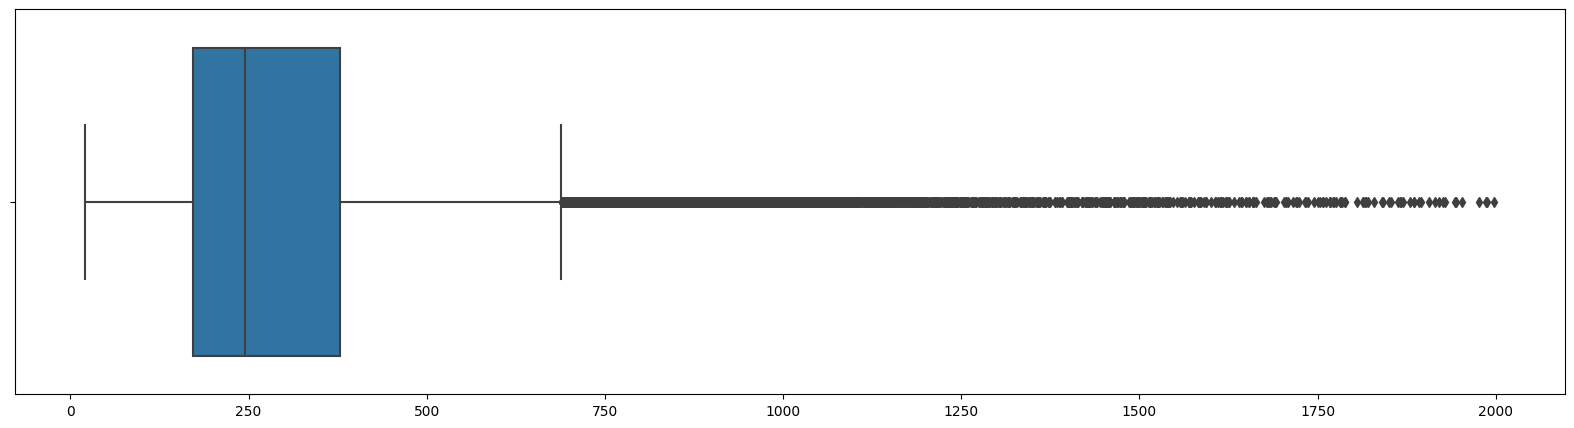

In [39]:
# Plotting description lengths by genre
plt.figure(figsize=(12,5))
sns.barplot(x='Genre',y='length_Text_cleaning',data=train_data,color='green')  
plt.xticks(rotation=60)
plt.show()
plt.figure(figsize=(20,5))
sns.boxplot(x=train_data['length_Text_cleaning'].values,hue='Genre',data=train_data)
plt.show()


In [23]:
#Text tokenization and vectorization

In [24]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
num_words = 50000
max_len = 250
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_data['Text_cleaning'].values)

In [25]:
# Load test data solution
test_path='Genre Classification Dataset/test_data_solution.txt'
test_data_solution=pd.read_csv( test_path , sep=':::',engine='python',names=['ID','Title','Genre','Description'])
test_data_solution.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [26]:
#Vectorization using TF-IDF

In [27]:
X = tokenizer.texts_to_sequences(train_data['Text_cleaning'].values)
X = pad_sequences(X, maxlen=max_len)
y = pd.get_dummies(train_data['Genre']).values

X_test = tokenizer.texts_to_sequences(test_data['Text_cleaning'].values)
X_test = pad_sequences(X_test, maxlen=max_len)
y_test = pd.get_dummies(test_data_solution['Genre']).values

In [28]:
#Build the LSTM model

In [29]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
#Training the model

In [34]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              mode='auto')]
history = model.fit(X, y, epochs=4, batch_size=32,validation_data=(X_test,y_test), callbacks=my_callbacks)

Epoch 1/4
1692/1692 [==============================] - 785s 463ms/step - loss: 1.9293 - accuracy: 0.4406 - val_loss: 1.6738 - val_accuracy: 0.5139
Epoch 2/4
1692/1692 [==============================] - 599s 354ms/step - loss: 1.4502 - accuracy: 0.5798 - val_loss: 1.5215 - val_accuracy: 0.5543
Epoch 3/4
1692/1692 [==============================] - 627s 371ms/step - loss: 1.1797 - accuracy: 0.6557 - val_loss: 1.5207 - val_accuracy: 0.5605
Epoch 4/4
1692/1692 [==============================] - 634s 374ms/step - loss: 0.9568 - accuracy: 0.7190 - val_loss: 1.5813 - val_accuracy: 0.5575


In [32]:
#Plotting the training Accuracy & Loss over epochs

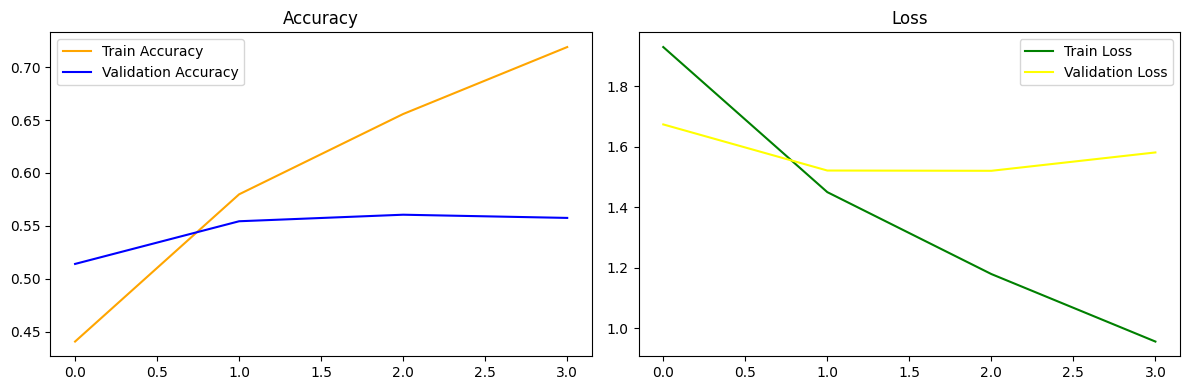

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy',c='orange')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',c='blue')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss',c='green')
plt.plot(history.history['val_loss'], label='Validation Loss',c='yellow')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()